In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

In [2]:
data = pd.read_csv("tommywilczek-walmart/tommywilczek-walmart/original/walmart.csv")
data

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,False,1.0,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,2,1,2010-02-05,False,26.0,11737.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,3,1,2010-02-05,False,17.0,13223.76,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,4,1,2010-02-05,False,45.0,37.44,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,5,1,2010-02-05,False,28.0,1085.29,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,423321,45,2013-06-28,False,NaN,NaN,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,B,118221
423321,423322,45,2013-07-05,False,NaN,NaN,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,B,118221
423322,423323,45,2013-07-12,False,NaN,NaN,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,B,118221
423323,423324,45,2013-07-19,False,NaN,NaN,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,B,118221


In [3]:
data = data.drop(["Unnamed: 0"], axis = 1)
data.set_index("Date", inplace=True)
data

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-02-05,1,False,1.0,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2010-02-05,1,False,26.0,11737.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2010-02-05,1,False,17.0,13223.76,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2010-02-05,1,False,45.0,37.44,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2010-02-05,1,False,28.0,1085.29,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-06-28,45,False,NaN,NaN,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,B,118221
2013-07-05,45,False,NaN,NaN,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,B,118221
2013-07-12,45,False,NaN,NaN,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,B,118221


In [4]:
# Replacing values A:3 ; B:2 ; C:1
data['Type'].replace(['A', 'B', 'C'], [3,2,1], inplace=True)

In [5]:
# Replacing values True = 1 and False = 0
data['IsHoliday'] = data['IsHoliday'].astype(int)

In [6]:
data = data[data["Weekly_Sales"].notna()]
data

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-02-05,1,0,1.0,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,3,151315
2010-02-05,1,0,26.0,11737.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,3,151315
2010-02-05,1,0,17.0,13223.76,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,3,151315
2010-02-05,1,0,45.0,37.44,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,3,151315
2010-02-05,1,0,28.0,1085.29,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,3,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,45,0,13.0,26240.14,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
2012-10-26,45,0,16.0,2660.02,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
2012-10-26,45,0,32.0,4131.54,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221


In [7]:
data.isna().sum()

Store                0
IsHoliday            0
Dept                 0
Weekly_Sales         0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [8]:
data.fillna(0, inplace=True)
data

<ipython-input-8-8e930ec314c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(0, inplace=True)


,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-02-05,1,0,1.0,24924.50,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
2010-02-05,1,0,26.0,11737.12,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
2010-02-05,1,0,17.0,13223.76,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
2010-02-05,1,0,45.0,37.44,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
2010-02-05,1,0,28.0,1085.29,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,45,0,13.0,26240.14,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
2012-10-26,45,0,16.0,2660.02,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
2012-10-26,45,0,32.0,4131.54,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221


In [9]:
data.isna().sum()

Store           0
IsHoliday       0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

## store wise division

In [10]:
# data.groupby("Store")

In [11]:
stores = np.unique(data["Store"])
datas = []
for store in stores:
    datas.append(data[data["Store"] == store])
# all data sorted by Stores in the list

In [12]:
# A random store
random_store = np.random.choice(stores) - 1
datas[random_store]

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-02-05,17,0,1.0,20304.23,23.11,2.666,0.00,0.0,0.0,0.00,0.00,126.442065,6.548,2,93188
2010-02-05,17,0,97.0,6863.29,23.11,2.666,0.00,0.0,0.0,0.00,0.00,126.442065,6.548,2,93188
2010-02-05,17,0,27.0,1143.00,23.11,2.666,0.00,0.0,0.0,0.00,0.00,126.442065,6.548,2,93188
2010-02-05,17,0,78.0,1.00,23.11,2.666,0.00,0.0,0.0,0.00,0.00,126.442065,6.548,2,93188
2010-02-05,17,0,44.0,7757.54,23.11,2.666,0.00,0.0,0.0,0.00,0.00,126.442065,6.548,2,93188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,17,0,41.0,24.00,39.94,3.755,5593.69,112.2,0.0,134.13,748.23,131.193097,5.527,2,93188
2012-10-26,17,0,27.0,2257.88,39.94,3.755,5593.69,112.2,0.0,134.13,748.23,131.193097,5.527,2,93188
2012-10-26,17,0,44.0,10057.70,39.94,3.755,5593.69,112.2,0.0,134.13,748.23,131.193097,5.527,2,93188


In [13]:
# Writing the csv files
k = 1
for df in datas:
    print(np.unique(df["Store"]))
    # df = df.set_index(["Store"])
    df.to_csv(f"Store_{k}.csv")
    k += 1

[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]


In [14]:
# Reading
store_datas = []
k = 1
while k < 46:
    name = f"df_{k}"
    st = pd.read_csv(f"Store_{k}.csv")
    store_datas.append(st)
    globals()[name] = st
    k += 1

In [16]:
df_2

,Date,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,2010-02-05,2,0,1.0,35034.06,40.19,2.572,0.00,0.00,0.0,0.00,0.00,210.752605,8.324,3,202307
1,2010-02-05,2,0,26.0,13414.69,40.19,2.572,0.00,0.00,0.0,0.00,0.00,210.752605,8.324,3,202307
2,2010-02-05,2,0,90.0,106222.74,40.19,2.572,0.00,0.00,0.0,0.00,0.00,210.752605,8.324,3,202307
3,2010-02-05,2,0,58.0,28454.00,40.19,2.572,0.00,0.00,0.0,0.00,0.00,210.752605,8.324,3,202307
4,2010-02-05,2,0,28.0,1592.41,40.19,2.572,0.00,0.00,0.0,0.00,0.00,210.752605,8.324,3,202307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,2012-10-26,2,0,9.0,34790.00,69.79,3.506,6152.59,129.77,200.0,272.29,2924.15,223.078337,6.170,3,202307
10234,2012-10-26,2,0,34.0,16047.51,69.79,3.506,6152.59,129.77,200.0,272.29,2924.15,223.078337,6.170,3,202307
10235,2012-10-26,2,0,49.0,12565.94,69.79,3.506,6152.59,129.77,200.0,272.29,2924.15,223.078337,6.170,3,202307
10236,2012-10-26,2,0,79.0,28451.69,69.79,3.506,6152.59,129.77,200.0,272.29,2924.15,223.078337,6.170,3,202307


## DBSCAN

In [15]:
from sklearn.cluster import DBSCAN

In [133]:
%%time
k = 0
labels = []
outliers = []
for df in store_datas:
    k += 1
    X = df.drop(["Date", "Store", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "CPI", "Unemployment", "Size"], axis = 1)
    dbscan = DBSCAN(eps = 1000, min_samples= 5)
    db_model = dbscan.fit(X)
    label = db_model.labels_
    labels.append(label)
    outliers.append(X[label == -1])
    print(f'No. of outliers in store {k} is {sum(label == -1)/X.shape[0]*100}%')
print("Exucution End")

No. of outliers in store 1 is 0.31237797735259665%
No. of outliers in store 2 is 0.3613987106856808%
No. of outliers in store 3 is 0.5533421868083223%
No. of outliers in store 4 is 0.27258566978193144%
No. of outliers in store 5 is 0.2333592621402378%
No. of outliers in store 6 is 0.21545392224072082%
No. of outliers in store 7 is 0.14341323499282935%
No. of outliers in store 8 is 0.15159171298635674%
No. of outliers in store 9 is 0.281944287808729%
No. of outliers in store 10 is 0.6592341250605913%
No. of outliers in store 11 is 0.24845955078513218%
No. of outliers in store 12 is 0.1545595054095827%
No. of outliers in store 13 is 0.22913881993507734%
No. of outliers in store 14 is 0.2589641434262948%
No. of outliers in store 15 is 0.16159983840016162%
No. of outliers in store 16 is 0.19061738854177698%
No. of outliers in store 17 is 0.09124087591240876%
No. of outliers in store 18 is 0.31443351252662544%
No. of outliers in store 19 is 0.20693732755222705%
No. of outliers in store 20 i

In [ ]:
# For a random store

Text(0.5, 1.0, 'Store No.16')

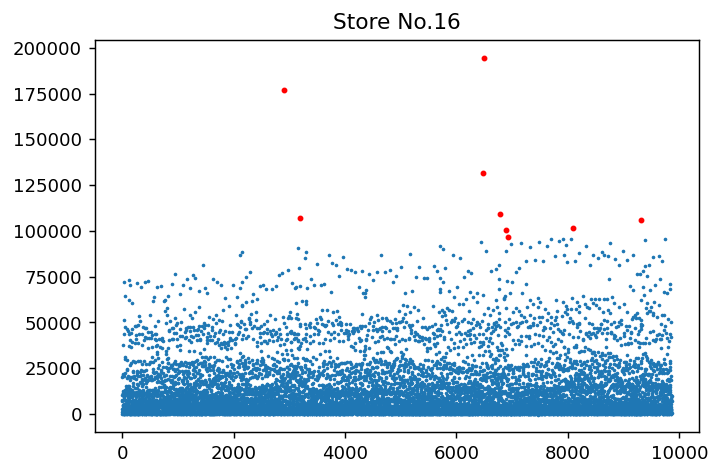

In [147]:
random_store = np.random.choice(range(1, 46))
X = store_datas[random_store]
Y = outliers[random_store]
plt.figure(dpi = 130)
plt.scatter(X.index, X["Weekly_Sales"], s = 1)
plt.scatter(Y.index, Y["Weekly_Sales"], c = "r", s = 5)
plt.title(f"Store No.{random_store}")

In [109]:
%%time
k = 1
X = store_datas[0].drop(["Date", "Store", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "CPI", "Unemployment", "Size"], axis = 1)
dbscan = DBSCAN(eps = 1000, min_samples= 5)
db_model = dbscan.fit(X)
labels = db_model.labels_
Y = X[labels == -1]
print(f'No. of outliers in store {k} is {sum(labels == -1)/X.shape[0]*100}%')

No. of outliers in store 1 is 0.31237797735259665%
Wall time: 394 ms


In [110]:
X.shape

(10244, 6)

In [111]:
Y

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,Type
143,1,92.0,143081.42,38.51,2.548,3
276,0,95.0,103652.58,46.63,2.561,3
632,0,38.0,101566.87,62.27,2.719,3
1570,0,38.0,100958.25,80.91,2.669,3
3039,1,72.0,196810.42,64.52,2.735,3
3045,1,92.0,170904.79,64.52,2.735,3
3094,0,95.0,100834.31,49.27,2.708,3
3303,0,7.0,166697.72,52.33,2.886,3
3344,0,92.0,181376.38,52.33,2.886,3
3369,0,90.0,103958.12,52.33,2.886,3


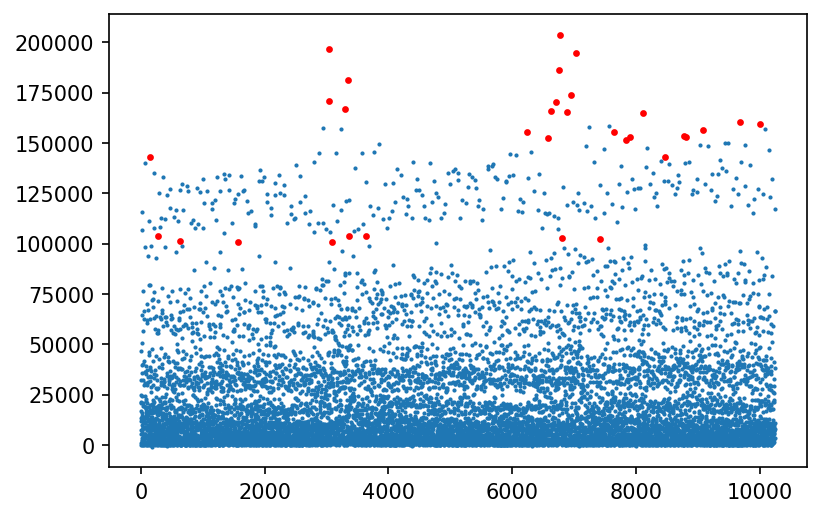

In [112]:
plt.figure(dpi = 150)
plt.scatter(X.index, X["Weekly_Sales"], s = 1)
plt.scatter(Y.index, Y["Weekly_Sales"], c = "r", s = 5)

In [122]:
pd.Series(labels).value_counts()

 0    9944
 1     246
-1      32
 2      10
 4       7
 3       5
dtype: int64

In [121]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

## K-Means

In [148]:
from sklearn.cluster import KMeans

In [149]:
X = store_datas[0].drop(["Date", "Store", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "CPI", "Unemployment", "Size"], axis = 1)
X

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,Type
0,0,1.0,24924.50,42.31,2.572,3
1,0,26.0,11737.12,42.31,2.572,3
2,0,17.0,13223.76,42.31,2.572,3
3,0,45.0,37.44,42.31,2.572,3
4,0,28.0,1085.29,42.31,2.572,3
...,...,...,...,...,...,...
10239,0,13.0,38512.48,69.16,3.506,3
10240,0,93.0,66622.89,69.16,3.506,3
10241,0,48.0,3341.00,69.16,3.506,3
10242,0,95.0,117375.38,69.16,3.506,3


In [155]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
k_lab = kmeans.labels_

In [156]:
np.unique(k_lab)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [157]:
pd.Series(k_lab).value_counts()

2    3739
6    2211
9    1248
0    1072
5     726
3     423
8     348
7     222
1     185
4      70
dtype: int64